In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp
import alphashape
from scipy import interpolate
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from matplotlib import style
from pathlib import Path  
style.use('ggplot') or plt.style.use('ggplot')


In [2]:
# Read in the observed stratigraphy data

radardata = {}
for i in range(6,7):
    radardata['data' + str(i)] = pd.read_csv('../Data/AdjustedRadarStatigraphy/Observed/RadarSegment' + str(i) + '.csv', sep=",")
radardata

{'data6':       index        psX        psY   base  IRH0    Surface  StratElev1  \
 0     32700  955089.19  1953243.7  234.4     0  73.378842         NaN   
 1     32701  955092.03  1953238.4  234.9     0  73.681794         NaN   
 2     32702  955094.88  1953233.2  236.7     0  73.980024         NaN   
 3     32703  955097.73  1953227.9  237.2     0  74.283398         NaN   
 4     32704  955100.58  1953222.6  237.2     0  74.586917         NaN   
 ...     ...        ...        ...    ...   ...        ...         ...   
 7295  39995  980315.75  1917916.7  365.5     0  38.279835   33.673536   
 7296  39996  980321.56  1917915.1  365.5     0  38.282219   33.876831   
 7297  39997  980327.38  1917913.5  366.0     0  38.284608   33.879219   
 7298  39998  980333.21  1917911.9  366.0     0  38.286999   33.881611   
 7299  39999  980339.04  1917910.4  366.2     0  38.289315   33.883927   
 
       StratElev2  StratElev3  StratElev4  StratElev5  StratElev6  StratElev7  \
 0      69.172636   

In [3]:
# Read in the full radar lines

dataXY = pd.read_csv('../Data/AdjustedRadarStatigraphy/DepthAdjustedStratigraphyElevation.csv', sep=",")

# Record the corss-section index ranges

CSs = {'CS1' : [0, 5200], 'CS2' : [6200, 12000], 'CS3' : [12100, 15500], 'CS4' : [17500, 22700], \
       'CS5' : [25000, 32500], 'CS6' : [32700, 40000], 'CS7' : [41700, 51500]}


In [4]:
dataXY

,psX,psY,base,IRH0,Surface,StratElev1,StratElev2,StratElev3,StratElev4,StratElev5,StratElev6,StratElev7,StratElev8,StratElev9,StratElev10,StratElev11,StratElev12
0,961154.51,1956754.7,178.2,0,7.360430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,961159.69,1956751.7,178.4,0,7.700226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,961164.87,1956748.6,178.7,0,8.049260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,961170.05,1956745.6,178.7,0,8.401228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,961175.23,1956742.5,179.1,0,8.762635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51197,934870.77,1950742.5,327.3,0,34.632630,NaN,29.482272,26.314879,22.280204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51198,934865.73,1950745.9,328.0,0,34.610552,NaN,29.253117,26.485374,22.464473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51199,934860.69,1950749.2,328.0,0,34.588516,NaN,29.231081,26.463338,22.663575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51200,934855.64,1950752.6,329.8,0,34.566206,NaN,29.208771,26.441028,22.641265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Read in GL data

dfGL = pd.read_csv("/Users/clara.henry/Documents/Derwael/Data/GroundingLine.csv")

points = np.column_stack((list(dfGL["Points:0"])[::10], list(dfGL["Points:1"])[::10]))

# [list(dfGL["Points:0"]), list(dfGL["Points:1"])]
alpha = 0.95 * alphashape.optimizealpha(points)
hull = alphashape.alphashape(points, alpha)
hull_pts = hull.exterior.coords.xy

hull_pts = hull_pts

for i in range(len(hull_pts[0])):
    hull_pts[0][i] = hull_pts[0][i]/1000
    hull_pts[1][i] = hull_pts[1][i]/1000


/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/shapely/ops.py:42: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  source = iter(source)
/Users/clara.henry/opt/anaconda3/lib/python3.9/site-packages/alphashape/optimizealpha.py:41: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return all([polygon.intersects(point) for point in points])


In [6]:
# Define the ages

ages = [0.00001, 100, 200, 300, 400, 550, 750, 1000, 1300, 1800, 2500, 3700, 5500, 8000]
#ages = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]


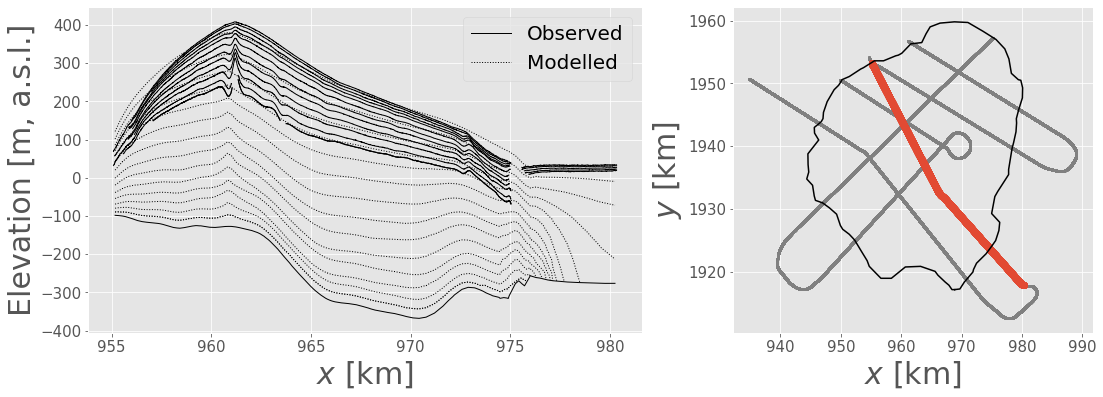

In [9]:
# Plot the sixth set of data

fig, ax = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1.3]})
for i in range(1,13):
    ax[0].plot(radardata['data6']['psX']/1000, radardata['data6']['StratElev' + str(i)], color='black', linewidth=1)
ax[0].plot(radardata['data6']['psX']/1000, radardata['data6']['StratElev' + str(i)], color='black', linewidth=1, label = 'Observed')

    
for i in ages:
    data = pd.read_csv('../Simulations/DerwaelSimulations/temp/n30.6dsdt150_AgeForInterview/ModelledStratigraphy6.csv', sep=",")
    df = data.loc[data['age'] == i]
    df = df.sort_values(by='Points:0')
    ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1)
ax[0].plot(df['Points:0']/1000, df['Points:2'], color='black', linestyle='dotted', linewidth=1, label = 'Modelled')
LSdata = pd.read_csv('../Simulations/DerwaelSimulations/temp/n30.6dsdt150_AgeForInterview/LS6.csv', sep=",")
LSdata = LSdata.sort_values(by='Points:0')
ax[0].plot(LSdata['Points:0']/1000, LSdata['Points:2'], linewidth=1, color='black')
# Plot the radar lines in the horizontal

i = 6
    
ax[1].scatter(dataXY['psX']/1000, dataXY['psY']/1000, s=5, color='grey')
ax[1].scatter(dataXY['psX'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000, dataXY['psY'][CSs['CS' + str(i)][0]:CSs['CS' + str(i)][1]]/1000)
ax[1].plot(hull_pts[0], hull_pts[1], color='black')

ax[0].set_xlabel('$x$ [km]', fontsize = 30)
ax[0].set_ylabel('Elevation [m, a.s.l.]', fontsize = 30)
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize = 20)
ax[1].set_xlabel('$x$ [km]', fontsize = 30)
ax[1].set_ylabel('$y$ [km]', fontsize = 30)
ax[1].tick_params(axis='both', which='major', labelsize=15)

fig.savefig('../Figures/StratigraphyComparisonForInterview' + str(i) + '.jpg', format='jpg', dpi=700, bbox_inches = "tight")
